In [ ]:
df = pd.read_csv("/content/drive/MyDrive/File for Colab/data_clean.csv", low_memory=False)
df.head()

,BAGIAN,PENYAKIT_KELUARGA,KEHAMILAN,KEBIASAAN,OLAHRAGA,ALERGI,TINGGI,BERAT,TENSI,NADI,...,TRIGLISERIDA,HDL_KOLEST,LDL_KOLEST,UREUM,KREATININ,ASAM_URAT_GINJAL,GULA_DARAH_PUASA,GULA_DARAH_2JAMPP,URINE_REDUKSI_PUASA,URINE_REDUKSI_2JAMPP
0,departemen mekanikal,jantung,-,NaN,+,-,1660.0,800.0,110/80,670.0,...,1740.0,420.0,1640.0,220.0,900.0,6100.0,860.0,870.0,negatif,negatif
1,departemen mekanikal,lain$ hepatitis $,-,NaN,-,-,1600.0,570.0,110/80,760.0,...,750.0,390.0,1690.0,190.0,10.0,5300.0,930.0,1050.0,negatif,negatif
2,departemen mekanikal,NaN,-,NaN,-,-,1550.0,520.0,120/70,830.0,...,690.0,670.0,940.0,200.0,500.0,2700.0,880.0,930.0,negatif,negatif
3,bagian ammonia pusri iii,NaN,-,NaN,+,-,1590.0,570.0,110/60,580.0,...,1170.0,430.0,1340.0,190.0,900.0,5400.0,1250.0,1970.0,negatif,negatif
4,program kemitraan usaha kecil,NaN,-,NaN,+,-,1710.0,620.0,110/70,630.0,...,590.0,540.0,1470.0,200.0,1100.0,5500.0,1070.0,1020.0,negatif,negatif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10637 entries, 0 to 10636
Columns: 110 entries, BAGIAN to URINE_REDUKSI_2JAMPP
dtypes: float64(33), object(77)
memory usage: 8.9+ MB


In [ ]:
drop_cols = ["BAGIAN"]

In [ ]:
df_clean = df.drop(columns =[c for c in drop_cols if c in df.columns])

In [ ]:
output_path = "/content/drive/MyDrive/File for Colab/data_processed.csv"
df_clean.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to /content/drive/MyDrive/File for Colab/data_processed.csv


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/File for Colab/data_processed.csv", low_memory=False)

In [ ]:
df.head()

,BAGIAN,PENYAKIT_KELUARGA,KEHAMILAN,KEBIASAAN,OLAHRAGA,ALERGI,TINGGI,BERAT,TENSI,NADI,...,TRIGLISERIDA,HDL_KOLEST,LDL_KOLEST,UREUM,KREATININ,ASAM_URAT_GINJAL,GULA_DARAH_PUASA,GULA_DARAH_2JAMPP,URINE_REDUKSI_PUASA,URINE_REDUKSI_2JAMPP
0,departemen mekanikal,jantung,-,NaN,+,-,1660.0,800.0,110/80,670.0,...,1740.0,420.0,1640.0,220.0,900.0,6100.0,860.0,870.0,negatif,negatif
1,departemen mekanikal,lain$ hepatitis $,-,NaN,-,-,1600.0,570.0,110/80,760.0,...,750.0,390.0,1690.0,190.0,10.0,5300.0,930.0,1050.0,negatif,negatif
2,departemen mekanikal,NaN,-,NaN,-,-,1550.0,520.0,120/70,830.0,...,690.0,670.0,940.0,200.0,500.0,2700.0,880.0,930.0,negatif,negatif
3,bagian ammonia pusri iii,NaN,-,NaN,+,-,1590.0,570.0,110/60,580.0,...,1170.0,430.0,1340.0,190.0,900.0,5400.0,1250.0,1970.0,negatif,negatif
4,program kemitraan usaha kecil,NaN,-,NaN,+,-,1710.0,620.0,110/70,630.0,...,590.0,540.0,1470.0,200.0,1100.0,5500.0,1070.0,1020.0,negatif,negatif


# **Imports and Cells Identification**

In [3]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# K-PROTOTYPES IMPLEMENTATION
class ManualKPrototypes:
    """
    A manual implementation of K-Prototypes clustering.
    Combines K-Means (numerical) and K-Modes (categorical).
    """
    def __init__(self, n_clusters, gamma, max_iter=20, random_state=42):
        self.n_clusters = int(n_clusters)
        self.gamma = float(gamma)
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids_num_ = None
        self.centroids_cat_ = None
        self.cost_ = None
        self.labels_ = None

    def fit_predict(self, X_num, X_cat):
        np.random.seed(self.random_state)
        n_samples, n_num_feats = X_num.shape
        _, n_cat_feats = X_cat.shape

        # Initialization
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids_num_ = X_num[random_indices].copy()
        self.centroids_cat_ = X_cat[random_indices].copy()

        labels = np.zeros(n_samples)

        for iteration in range(self.max_iter):
            dist_num = np.sum((X_num[:, np.newaxis, :] - self.centroids_num_[np.newaxis, :, :]) ** 2, axis=2)
            dist_cat = np.sum(X_cat[:, np.newaxis, :] != self.centroids_cat_[np.newaxis, :, :], axis=2)
            total_dist = dist_num + (self.gamma * dist_cat)

            new_labels = np.argmin(total_dist, axis=1)

            if np.array_equal(labels, new_labels):
                break
            labels = new_labels

            for k in range(self.n_clusters):
                mask = (labels == k)
                if np.sum(mask) == 0: continue

                self.centroids_num_[k] = np.mean(X_num[mask], axis=0)

                cluster_cat_data = X_cat[mask]
                for col_idx in range(n_cat_feats):
                    values, counts = np.unique(cluster_cat_data[:, col_idx], return_counts=True)
                    self.centroids_cat_[k, col_idx] = values[np.argmax(counts)]

        # Final Cost Calculation
        dist_num = np.sum((X_num[:, np.newaxis, :] - self.centroids_num_[np.newaxis, :, :]) ** 2, axis=2)
        dist_cat = np.sum(X_cat[:, np.newaxis, :] != self.centroids_cat_[np.newaxis, :, :], axis=2)
        min_dists = np.min(dist_num + (self.gamma * dist_cat), axis=1)
        self.cost_ = np.sum(min_dists)
        self.labels_ = labels

        return labels, self.cost_

# **Data Preparation & Pre-processing**

In [4]:
csv_path = "/content/drive/MyDrive/File for Colab/data_processed.csv"
df = pd.read_csv(csv_path)

# Identify columns
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(exclude=["object"]).columns.tolist()

# Manual Missing Value Imputation
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Categorical: Fill with "Unknown"
for col in cat_cols:
    df[col] = df[col].astype(str).replace("nan", "Unknown")

# Manual Standard Scaling
# Formula: z = (x - mean) / std
X_num_raw = df[num_cols].values
means = np.mean(X_num_raw, axis=0)
stds = np.std(X_num_raw, axis=0)
stds[stds == 0] = 1  # Prevent division by zero
X_num = (X_num_raw - means) / stds

X_cat = df[cat_cols].values

print(f"Data Ready. Shape: {df.shape}")
print(f"Numerical features: {X_num.shape[1]}, Categorical features: {X_cat.shape[1]}")

/tmp/ipython-input-2734488882.py:2: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Data Ready. Shape: (10637, 109)
Numerical features: 33, Categorical features: 76


# **Genetic Algorithm Functions and Parameters**

In [5]:
# GENETIC ALGORITHM PARAMETERS & FUNCTIONS

# GA Parameters
POPULATION_SIZE = 10
N_GENERATIONS = 5   # Increase to 10-20 for better results if you have time
MUTATION_RATE = 0.3
K_MIN, K_MAX = 2, 6
GAMMA_MIN, GAMMA_MAX = 0.1, 5.0
SAMPLE_SIZE = 1000

# Cache to store results of (k, gamma) to avoid re-computing
fitness_cache = {}

def evaluate_fitness(individual, X_num, X_cat):
    """
    Runs Manual K-Prototypes and returns the cost.
    individual = [k, gamma]
    """
    k, gamma = individual
    k = int(round(k))

    # Bounds check
    k = max(K_MIN, min(K_MAX, k))
    gamma = max(GAMMA_MIN, min(GAMMA_MAX, gamma))

    # Check cache
    key = (k, round(gamma, 3))
    if key in fitness_cache:
        return fitness_cache[key]

    # Use a random sample for speed
    if X_num.shape[0] > SAMPLE_SIZE:
        idx = np.random.choice(X_num.shape[0], SAMPLE_SIZE, replace=False)
        X_num_sub = X_num[idx]
        X_cat_sub = X_cat[idx]
    else:
        X_num_sub, X_cat_sub = X_num, X_cat

    # Run Manual Clustering
    try:
        kp = ManualKPrototypes(n_clusters=k, gamma=gamma, max_iter=10)
        _, cost = kp.fit_predict(X_num_sub, X_cat_sub)
    except Exception as e:
        cost = float('inf')

    fitness_cache[key] = cost
    return cost

def create_population(size):
    pop = []
    for _ in range(size):
        k = random.randint(K_MIN, K_MAX)
        gamma = random.uniform(GAMMA_MIN, GAMMA_MAX)
        pop.append([k, gamma])
    return pop

def mutate(individual):
    k, gamma = individual
    # Mutate k
    if random.random() < MUTATION_RATE:
        k += random.choice([-1, 1])
        k = max(K_MIN, min(K_MAX, k))
    # Mutate gamma
    if random.random() < MUTATION_RATE:
        gamma += random.uniform(-0.5, 0.5)
        gamma = max(GAMMA_MIN, min(GAMMA_MAX, gamma))
    return [k, gamma]

def crossover(p1, p2):
    # Swap gamma between parents
    c1 = [p1[0], p2[1]]
    c2 = [p2[0], p1[1]]
    return c1, c2


Starting Genetic Algorithm Optimization...
Gen 1: Best Cost = 28150.12 (k=6, gamma=0.54)
Gen 2: Best Cost = 28150.12 (k=6, gamma=0.54)
Gen 3: Best Cost = 24535.80 (k=6, gamma=0.20)
Gen 4: Best Cost = 24535.80 (k=6, gamma=0.20)
Gen 5: Best Cost = 24535.80 (k=6, gamma=0.20)

Optimization Finished!
Best Parameters: k=6, gamma=0.201
Best Cost: 24535.80


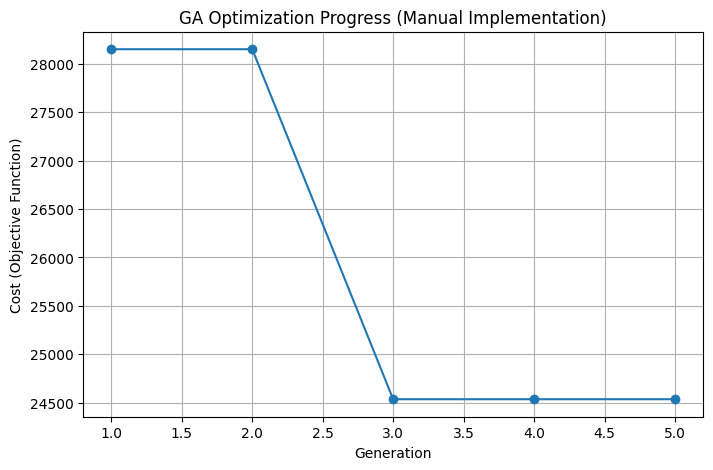

In [6]:
# RUN GA OPTIMIZATION
print("\nStarting Genetic Algorithm Optimization...")
population = create_population(POPULATION_SIZE)
best_costs_history = []
best_global_ind = None
best_global_cost = float('inf')

for gen in range(N_GENERATIONS):
    # Evaluate
    scored_pop = []
    for ind in population:
        cost = evaluate_fitness(ind, X_num, X_cat)
        scored_pop.append((ind, cost))

        if cost < best_global_cost:
            best_global_cost = cost
            best_global_ind = ind[:]

    # Sort by cost (lowest is best)
    scored_pop.sort(key=lambda x: x[1])
    best_gen_cost = scored_pop[0][1]
    best_costs_history.append(best_gen_cost)

    print(f"Gen {gen+1}: Best Cost = {best_gen_cost:.2f} (k={scored_pop[0][0][0]}, gamma={scored_pop[0][0][1]:.2f})")

    # Selection & Next Gen
    new_pop = [scored_pop[0][0]] # Elitism: keep best

    while len(new_pop) < POPULATION_SIZE:
        # Tournament Selection (pick 2 random, take best)
        candidates = random.sample(scored_pop, 2)
        parent1 = min(candidates, key=lambda x: x[1])[0]
        candidates = random.sample(scored_pop, 2)
        parent2 = min(candidates, key=lambda x: x[1])[0]

        child1, child2 = crossover(parent1, parent2)
        new_pop.append(mutate(child1))
        if len(new_pop) < POPULATION_SIZE:
            new_pop.append(mutate(child2))

    population = new_pop

print("\nOptimization Finished!")
print(f"Best Parameters: k={best_global_ind[0]}, gamma={best_global_ind[1]:.3f}")
print(f"Best Cost: {best_global_cost:.2f}")

# Plot GA History
plt.figure(figsize=(8, 5))
plt.plot(range(1, N_GENERATIONS+1), best_costs_history, marker='o', linestyle='-')
plt.title('GA Optimization Progress (Manual Implementation)')
plt.xlabel('Generation')
plt.ylabel('Cost (Objective Function)')
plt.grid(True)
plt.show()

# **Clustering and Analysis**

In [7]:
# FINAL CLUSTERING & TEXT ANALYSIS
if best_global_ind is not None:
    best_k = int(round(best_global_ind[0]))
    best_gamma = float(best_global_ind[1])
    print(f"\n Running Final Clustering on Full Data ")
    print(f"Parameters: k={best_k}, gamma={best_gamma:.3f}")

    # Run final clustering on full dataset
    kp_final = ManualKPrototypes(n_clusters=best_k, gamma=best_gamma, max_iter=50, random_state=42)
    labels_final, cost_final = kp_final.fit_predict(X_num, X_cat)
    print(f"Final Cost: {cost_final:.2f}")

    # Cluster sizes
    unique_labels, counts = np.unique(labels_final, return_counts=True)
    print(f"\nCluster Distribution:")
    for lbl, cnt in zip(unique_labels, counts):
        print(f"  Cluster {int(lbl)}: {int(cnt)} points ({100*cnt/len(labels_final):.1f}%)")

    # ========== DETAILED CLUSTER ANALYSIS ==========
    print("\n" + "="*80)
    print("DETAILED CLUSTER CHARACTERISTICS & INTERPRETATION")
    print("="*80)

    cluster_names = {}

    for k in range(best_k):
        mask = (labels_final == k)
        cluster_size = np.sum(mask)

        print(f"\n{'='*80}")
        print(f"🔹 CLUSTER {int(k)} - {int(cluster_size)} members ({100*cluster_size/len(labels_final):.1f}%)")
        print(f"{'='*80}")

        # Numerical Features Summary
        print(f"\n Numerical Features (Mean ± Std):")
        print(f"-" * 80)
        key_features = []
        for col_idx, col_name in enumerate(num_cols):
            cluster_vals = X_num_raw[mask, col_idx]
            mean_val = np.mean(cluster_vals)
            std_val = np.std(cluster_vals)
            global_mean = np.mean(X_num_raw[:, col_idx])
            diff_pct = 100 * (mean_val - global_mean) / (global_mean + 1e-6) if global_mean != 0 else 0
            marker = " ⬆️" if diff_pct > 15 else " ⬇️" if diff_pct < -15 else ""
            print(f"  {col_name:25s}: {mean_val:10.2f} ± {std_val:7.2f}  (Global: {global_mean:.2f}, Diff: {diff_pct:+.1f}%){marker}")

            if abs(diff_pct) > 20:
                key_features.append(f"{col_name}:{mean_val:.0f}")

        # Categorical Features Summary
        print(f"\n🏷️  Categorical Features (Mode & Distribution):")
        print(f"-" * 80)
        for col_idx, col_name in enumerate(cat_cols):
            cluster_cat = X_cat[mask, col_idx]
            unique_vals, counts_cat = np.unique(cluster_cat, return_counts=True)

            mode_idx = np.argmax(counts_cat)
            mode_val = unique_vals[mode_idx]
            mode_count = counts_cat[mode_idx]
            mode_pct = 100 * mode_count / len(cluster_cat)

            print(f"  {col_name:25s}: '{mode_val}' ({int(mode_count)}/{int(len(cluster_cat))} = {mode_pct:.1f}%)")

            if mode_pct > 60:
                key_features.append(f"{col_name}={mode_val[:10]}")

            sorted_idx = np.argsort(counts_cat)[::-1]
            if len(sorted_idx) > 1:
                print(f"    {'Top values:':25s}", end="")
                for i, idx in enumerate(sorted_idx[:3]):
                    if i > 0: print(f"{'':27s}", end="")
                    print(f"'{unique_vals[idx]}': {counts_cat[idx]} ({100*counts_cat[idx]/len(cluster_cat):.1f}%)")

        interpretation = " | ".join(key_features[:3]) if key_features else "General cluster"
        cluster_names[k] = interpretation
        print(f"\n CLUSTER INTERPRETATION: {interpretation}")
else:
    print("Optimization failed. No best parameters found.")


 Running Final Clustering on Full Data 
Parameters: k=6, gamma=0.201
Final Cost: 316461.33

Cluster Distribution:
  Cluster 0: 2207 points (20.7%)
  Cluster 1: 9 points (0.1%)
  Cluster 2: 250 points (2.4%)
  Cluster 3: 2706 points (25.4%)
  Cluster 4: 850 points (8.0%)
  Cluster 5: 4615 points (43.4%)

DETAILED CLUSTER CHARACTERISTICS & INTERPRETATION

🔹 CLUSTER 0 - 2207 members (20.7%)

 Numerical Features (Mean ± Std):
--------------------------------------------------------------------------------
  TINGGI                   :    1682.17 ±   62.00  (Global: 1653.67, Diff: +1.7%)
  BERAT                    :     752.81 ± 2106.13  (Global: 732.17, Diff: +2.8%)
  NADI                     :     703.45 ±   95.99  (Global: 735.44, Diff: -4.3%)
  PERNAPASAN               :     210.14 ±  431.13  (Global: 211.78, Diff: -0.8%)
  SUHU                     :    3271.52 ± 9830.00  (Global: 3397.95, Diff: -3.7%)
  HB                       :   14577.64 ± 2320.50  (Global: 12847.87, Diff: +13.5%)
 


Computing 2D projection via SVD...


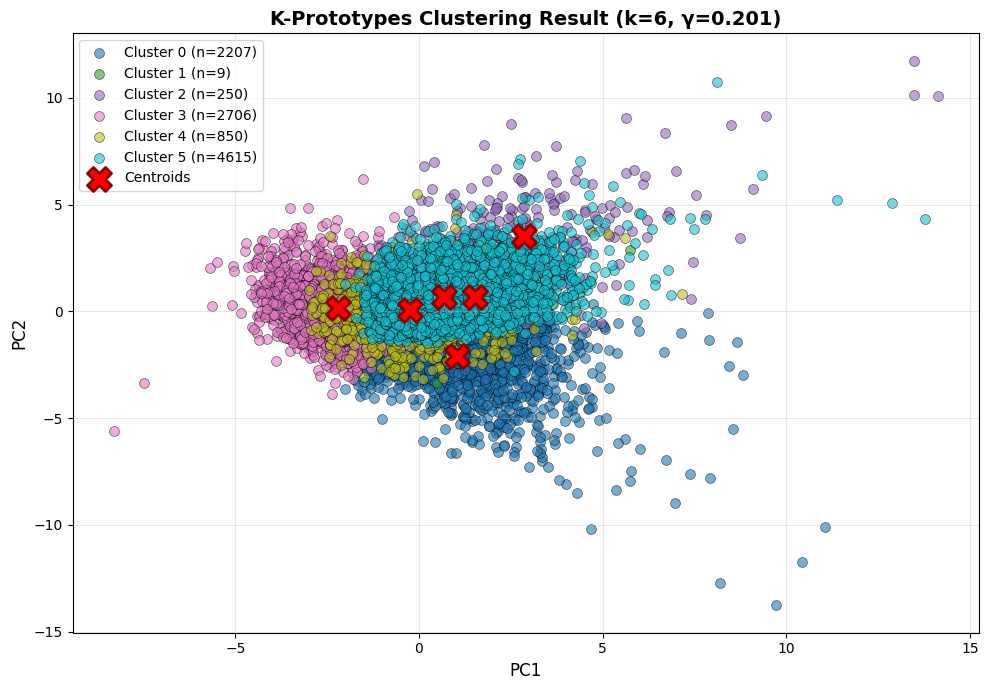


Generating individual scatter plots...


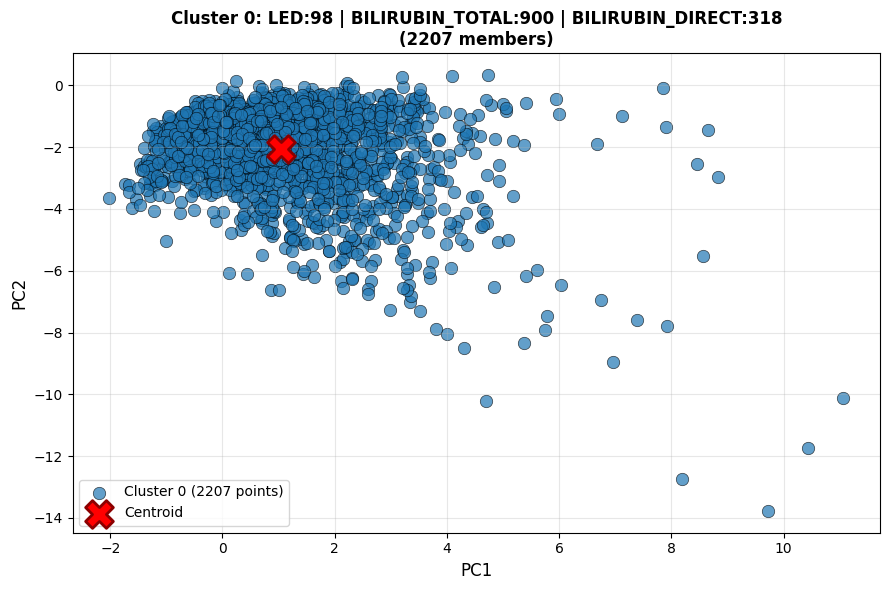

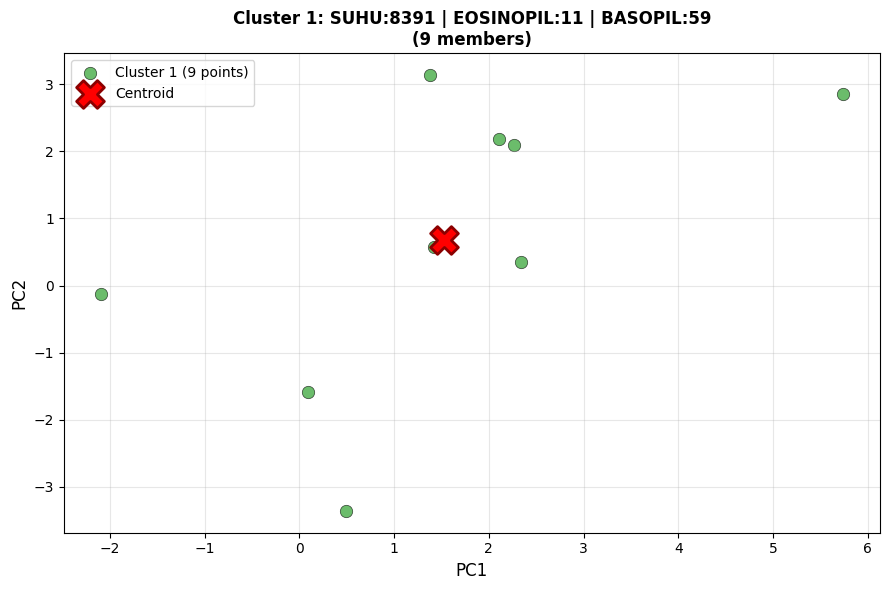

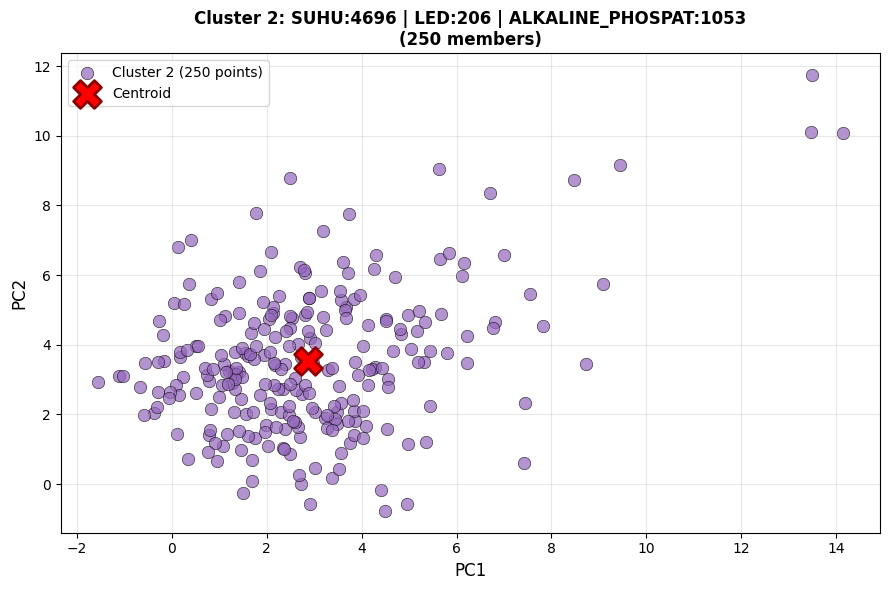

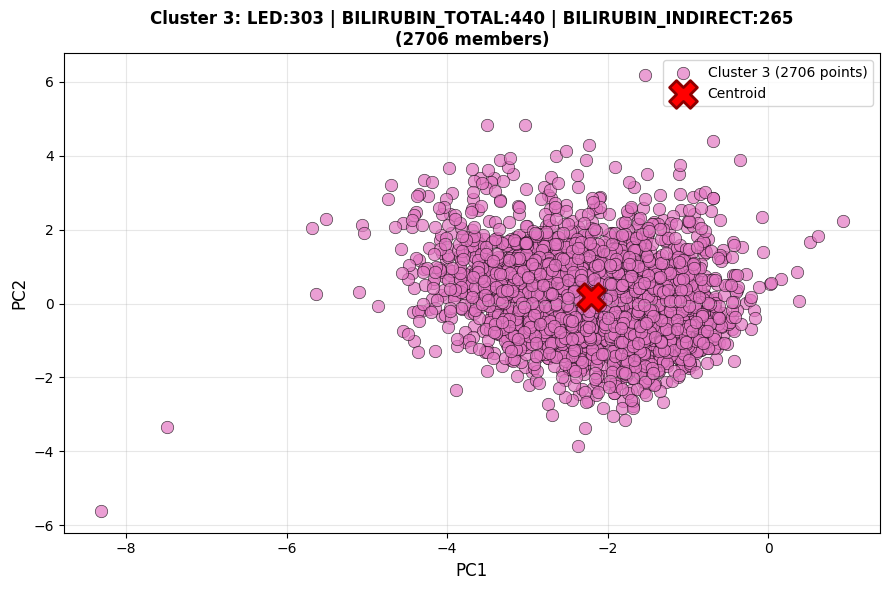

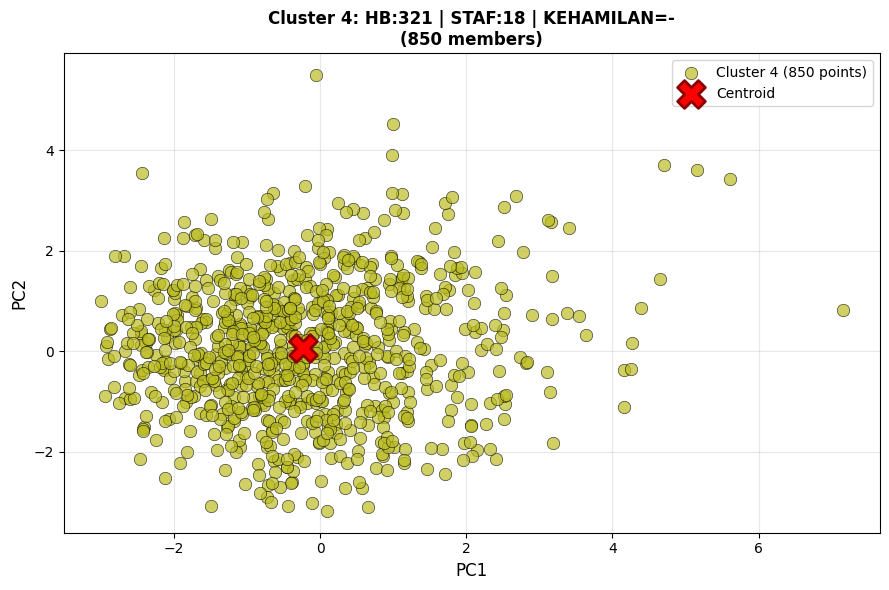

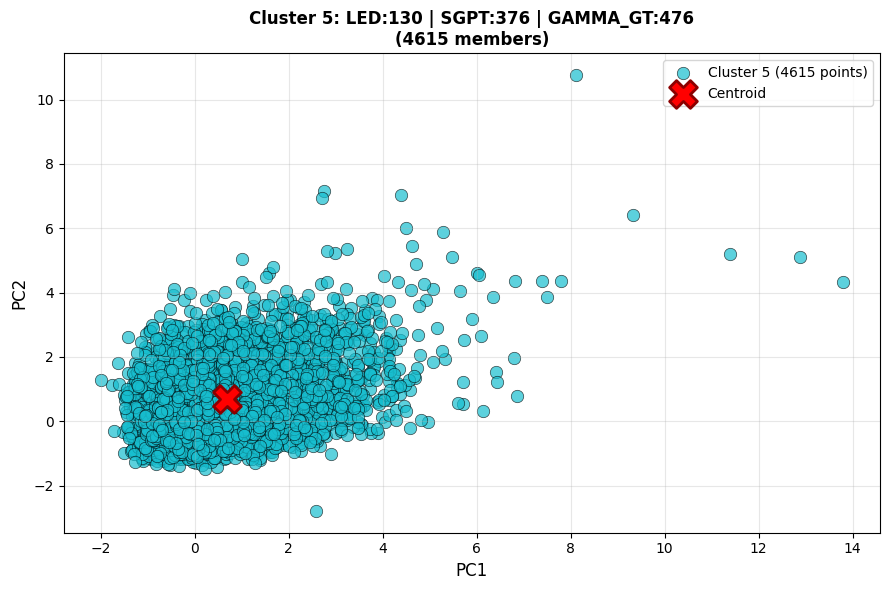

In [8]:
# VISUALIZATION (SVD & SCATTER PLOTS)
if best_global_ind is not None:
    print("\nComputing 2D projection via SVD...")
    X_mean = X_num.mean(axis=0)
    X_centered = X_num - X_mean
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    X_proj = (U * S)[:, :2]  # Project to first 2 principal components

    # Project centroids
    components = Vt.T[:, :2]
    centroids_proj = (kp_final.centroids_num_ - X_mean).dot(components)

    # 1. Overall Plot
    fig, ax = plt.subplots(figsize=(10, 7))
    colors = plt.cm.tab10(np.linspace(0, 1, best_k))

    for k in range(best_k):
        mask = (labels_final == k)
        ax.scatter(X_proj[mask, 0], X_proj[mask, 1],
                   c=[colors[k]], s=50, alpha=0.6,
                   label=f'Cluster {k} (n={int(np.sum(mask))})',
                   edgecolors='black', linewidth=0.5)

    ax.scatter(centroids_proj[:, 0], centroids_proj[:, 1],
               c='red', s=300, marker='X',
               label='Centroids', edgecolors='darkred', linewidth=2, zorder=5)

    ax.set_xlabel(f'PC1', fontsize=12)
    ax.set_ylabel(f'PC2', fontsize=12)
    ax.set_title(f'K-Prototypes Clustering Result (k={best_k}, γ={best_gamma:.3f})', fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 2. Individual Cluster Plots
    print("\nGenerating individual scatter plots...")
    for k in range(best_k):
        mask = (labels_final == k)
        cluster_size = np.sum(mask)

        fig, ax = plt.subplots(figsize=(9, 6))
        ax.scatter(X_proj[mask, 0], X_proj[mask, 1],
                   c=[colors[k]], s=80, alpha=0.7,
                   label=f'Cluster {k} ({int(cluster_size)} points)',
                   edgecolors='black', linewidth=0.5)

        ax.scatter(centroids_proj[k, 0], centroids_proj[k, 1],
                   c='red', s=400, marker='X',
                   label='Centroid', edgecolors='darkred', linewidth=2, zorder=5)

        ax.set_xlabel(f'PC1', fontsize=12)
        ax.set_ylabel(f'PC2', fontsize=12)
        ax.set_title(f'Cluster {k}: {cluster_names[k]}\n({int(cluster_size)} members)', fontsize=12, fontweight='bold')
        ax.legend(loc='best', fontsize=10)
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

In [9]:
# SUMMARY & BUSINESS INSIGHTS
if best_global_ind is not None:
    print("\n" + "="*80)
    print("📋 CLUSTER INTERPRETATION SUMMARY & BUSINESS INSIGHTS")
    print("="*80)

    for k in range(best_k):
        mask = (labels_final == k)
        cluster_size = np.sum(mask)

        print(f"\n{'='*80}")
        print(f"CLUSTER {int(k)}: {cluster_names[k]}")
        print(f"{'='*80}")
        print(f"Size: {int(cluster_size)} members ({100*cluster_size/len(labels_final):.1f}% of total)")

        interpretation_parts = []
        num_interpretation = []
        for col_idx, col_name in enumerate(num_cols):
            cluster_vals = X_num_raw[mask, col_idx]
            mean_val = np.mean(cluster_vals)
            global_mean = np.mean(X_num_raw[:, col_idx])
            global_std = np.std(X_num_raw[:, col_idx])
            z_score = (mean_val - global_mean) / (global_std + 1e-6)

            if abs(z_score) > 1.5:
                direction = "significantly higher" if z_score > 0 else "significantly lower"
                num_interpretation.append(f"  • {col_name}: {direction} ({mean_val:.2f} vs {global_mean:.2f})")

        if num_interpretation:
            print(f"\n Numerical Characteristics:")
            for item in num_interpretation:
                print(item)

        cat_interpretation = []
        for col_idx, col_name in enumerate(cat_cols):
            cluster_cat = X_cat[mask, col_idx]
            unique_vals, counts_cat = np.unique(cluster_cat, return_counts=True)
            mode_idx = np.argmax(counts_cat)
            mode_val = unique_vals[mode_idx]
            mode_pct = 100 * counts_cat[mode_idx] / len(cluster_cat)

            if mode_pct > 60:
                cat_interpretation.append(f"  • {col_name}: Predominantly '{mode_val}' ({mode_pct:.1f}%)")

        if cat_interpretation:
            print(f"\n  Categorical Characteristics:")
            for item in cat_interpretation:
                print(item)

        # Risk or opportunity assessment
        print(f"\n Key Insights:")
        if 'KELUHAN' in cat_cols:
            col_idx = cat_cols.index('KELUHAN')
            cluster_cat = X_cat[mask, col_idx]
            has_complaint = (cluster_cat != 'nan').sum()
            print(f"  • Complaint Rate: {100*has_complaint/len(cluster_cat):.1f}%")

    print("\n" + "="*80)
    print("ANALYSIS COMPLETE")


📋 CLUSTER INTERPRETATION SUMMARY & BUSINESS INSIGHTS

CLUSTER 0: LED:98 | BILIRUBIN_TOTAL:900 | BILIRUBIN_DIRECT:318
Size: 2207 members (20.7% of total)

  Categorical Characteristics:
  • KEHAMILAN: Predominantly '-' (97.6%)
  • KEBIASAAN: Predominantly 'Unknown' (63.8%)
  • OLAHRAGA: Predominantly '+' (68.7%)
  • ALERGI: Predominantly '-' (98.4%)
  • KULIT_RAMBUT: Predominantly 'normal' (100.0%)
  • VISUS_MATA: Predominantly 'od :  e os :  e' (100.0%)
  • PENYAKIT_MATA: Predominantly 'normal' (100.0%)
  • CONJUNGTIVA: Predominantly 'normal' (98.4%)
  • SCLERA: Predominantly 'normal' (99.9%)
  • KELAINAN_MATA_LAIN: Predominantly 'Unknown' (99.5%)
  • TELINGA: Predominantly 'normal' (60.4%)
  • MEMBRAN_TYMPANI: Predominantly 'normal' (60.2%)
  • REFLEK_CAHAYA: Predominantly 'normal' (60.3%)
  • HIDUNG: Predominantly 'normal' (60.4%)
  • SEPTUM_DEVIASI: Predominantly 'normal' (60.2%)
  • POLYP: Predominantly 'normal' (60.3%)
  • KERONGKONGAN: Predominantly 'normal' (60.4%)
  • HERNIA: 